In [ ]:
# we trying in this project to understand the relationship between 
# saleries and other variables such that provided in this dataset eduction and gender 
# the was provided by Suadi General Authority for Statistics

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()

Saving Salary by Education KSA.csv to Salary by Education KSA.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Salary by Education KSA.csv']))

In [4]:
#EDA
#Explor the data 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree Level  504 non-null    object
 1   Nationality   504 non-null    object
 2   Gender        504 non-null    object
 3   Year Quarter  504 non-null    object
 4   Salary        504 non-null    int64 
 5   Currency      504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


In [5]:
df.head()

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR
2,Primary,Saudi,Female,2017 Q1,4172,SAR
3,Primary,Saudi,Male,2017 Q1,6172,SAR
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Salary,504.0,8950.031746,6372.635277,1331.0,4194.0,7890.5,12448.75,35622.0


In [7]:
#reorder Degree Level column acconding to the level of degrees
# set Degree Level as index
df.set_index('Degree Level',inplace=True)

In [8]:
#reorder Degree Level column
df = df.loc[['Primary','Secondary','Intermediate','Diploma','Bachelor','Master Degree','Doctorate'], :]

In [9]:
#reverse setting index
df.reset_index(inplace = True)


In [10]:
df['Degree Level'].unique()

array(['Primary', 'Secondary', 'Intermediate', 'Diploma', 'Bachelor',
       'Master Degree', 'Doctorate'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree Level  504 non-null    object
 1   Nationality   504 non-null    object
 2   Gender        504 non-null    object
 3   Year Quarter  504 non-null    object
 4   Salary        504 non-null    int64 
 5   Currency      504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


In [12]:
df.isnull().sum()

Degree Level    0
Nationality     0
Gender          0
Year Quarter    0
Salary          0
Currency        0
dtype: int64

In [13]:
#get_dummies
df_D = pd.get_dummies(df, columns=['Nationality','Degree Level', 'Gender']).corr().copy()

In [14]:
df_D

,Salary,Nationality_NonSaudi,Nationality_Saudi,Degree Level_Bachelor,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Female,Gender_Male
Salary,1.000000,-0.359148,0.359148,0.037548,-0.122695,0.698043,-0.310917,0.310875,-0.345063,-0.267789,-0.201918,0.201918
Nationality_NonSaudi,-0.359148,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nationality_Saudi,0.359148,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Degree Level_Bachelor,0.037548,0.000000,0.000000,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.000000,0.000000
Degree Level_Diploma,-0.122695,0.000000,0.000000,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.000000,0.000000
Degree Level_Doctorate,0.698043,0.000000,0.000000,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,0.000000,0.000000
Degree Level_Intermediate,-0.310917,0.000000,0.000000,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,0.000000,0.000000
Degree Level_Master Degree,0.310875,0.000000,0.000000,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,0.000000,0.000000
Degree Level_Primary,-0.345063,0.000000,0.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,-0.166667,0.000000,0.000000
Degree Level_Secondary,-0.267789,0.000000,0.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,1.000000,0.000000,0.000000


In [15]:
df_D['Salary'].sort_values(ascending=False)


Salary                        1.000000
Degree Level_Doctorate        0.698043
Nationality_Saudi             0.359148
Degree Level_Master Degree    0.310875
Gender_Male                   0.201918
Degree Level_Bachelor         0.037548
Degree Level_Diploma         -0.122695
Gender_Female                -0.201918
Degree Level_Secondary       -0.267789
Degree Level_Intermediate    -0.310917
Degree Level_Primary         -0.345063
Nationality_NonSaudi         -0.359148
Name: Salary, dtype: float64

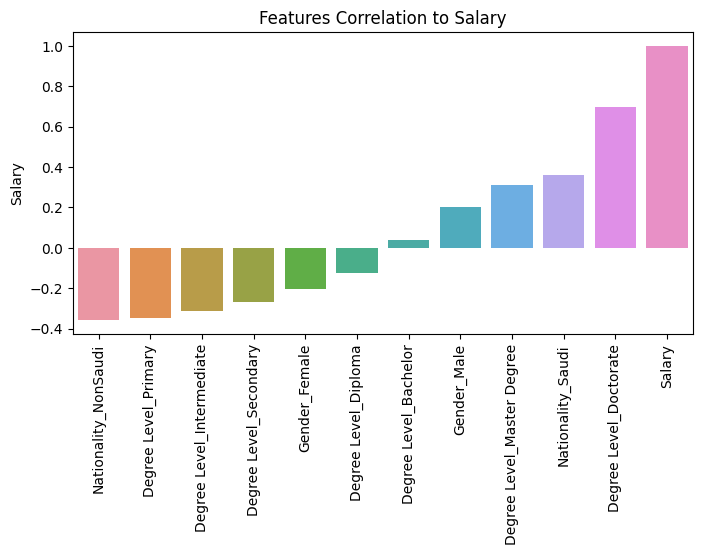

In [16]:
plt.figure(figsize=(8,4),dpi=100)
sns.barplot(x=df_D['Salary'].sort_values().index,y=df_D['Salary'].sort_values())
plt.title("Features Correlation to Salary")
plt.xticks(rotation=90);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree Level  504 non-null    object
 1   Nationality   504 non-null    object
 2   Gender        504 non-null    object
 3   Year Quarter  504 non-null    object
 4   Salary        504 non-null    int64 
 5   Currency      504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


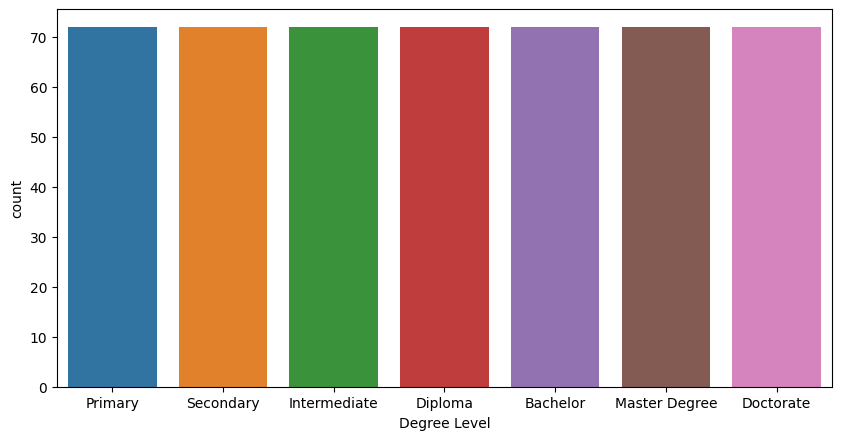

In [18]:

plt.figure(figsize=(10,5),dpi=100)
sns.countplot(df['Degree Level'])

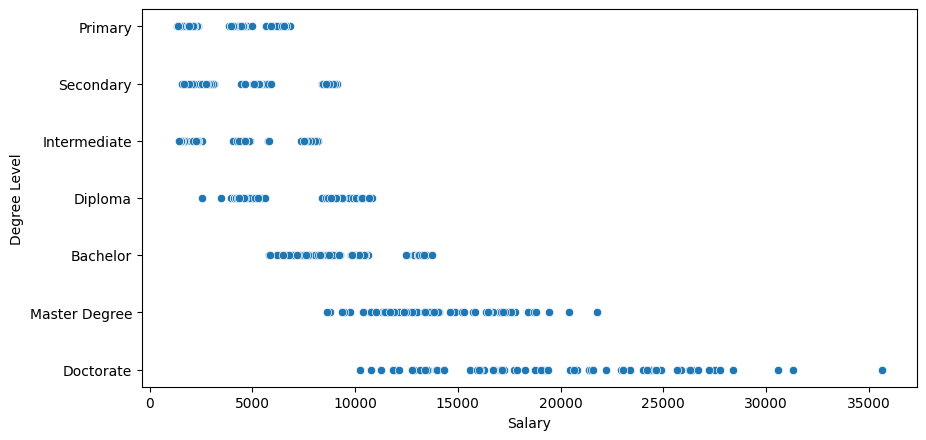

In [19]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(data = df, x = 'Salary', y = 'Degree Level')

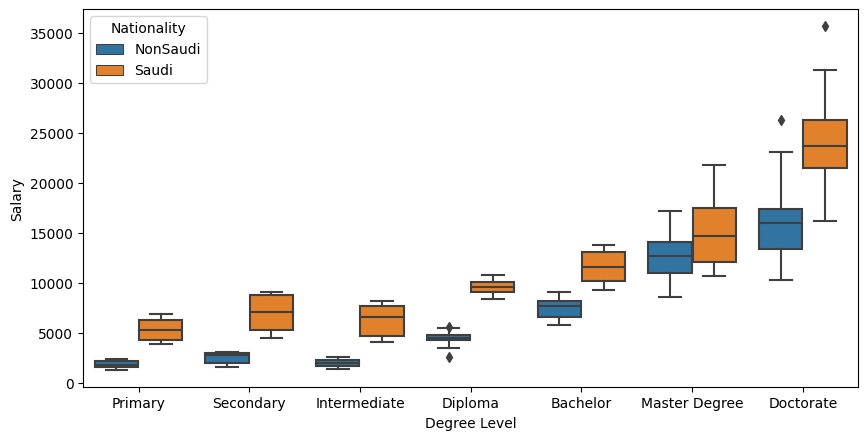

In [20]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(data = df, x = 'Degree Level', y = 'Salary', hue='Nationality')

In [21]:
 # min salary
 df.loc[df['Salary'].idxmin()]


Degree Level     Primary
Nationality     NonSaudi
Gender            Female
Year Quarter     2020 Q4
Salary              1331
Currency             SAR
Name: 60, dtype: object

In [22]:
 # Max salary
 df.loc[df['Salary'].idxmax()]

Degree Level    Doctorate
Nationality         Saudi
Gender               Male
Year Quarter      2021 Q1
Salary              35622
Currency              SAR
Name: 499, dtype: object

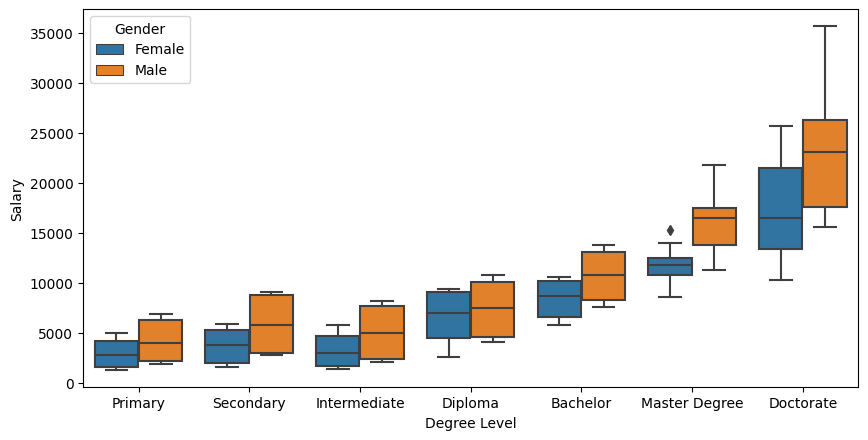

In [23]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(data = df, x = 'Degree Level', y = 'Salary', hue='Gender')

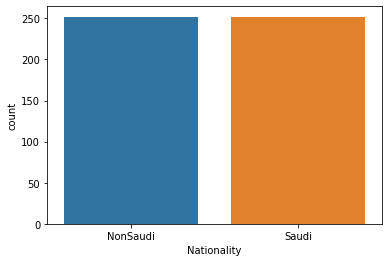

In [24]:
sns.countplot(data = df, x='Nationality')

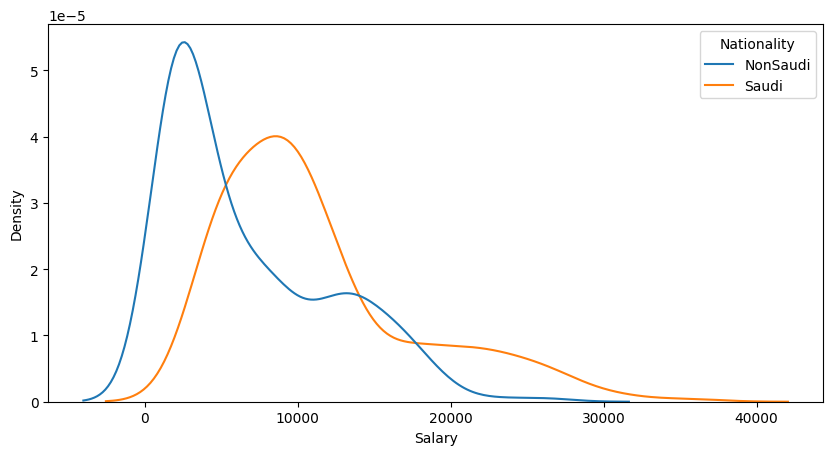

In [25]:
plt.figure(figsize=(10,5),dpi=100)

sns.kdeplot(data=df, x='Salary', hue= 'Nationality')


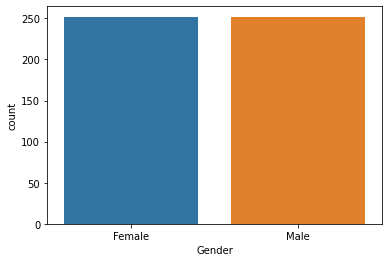

In [26]:
sns.countplot(data = df, x = 'Gender');

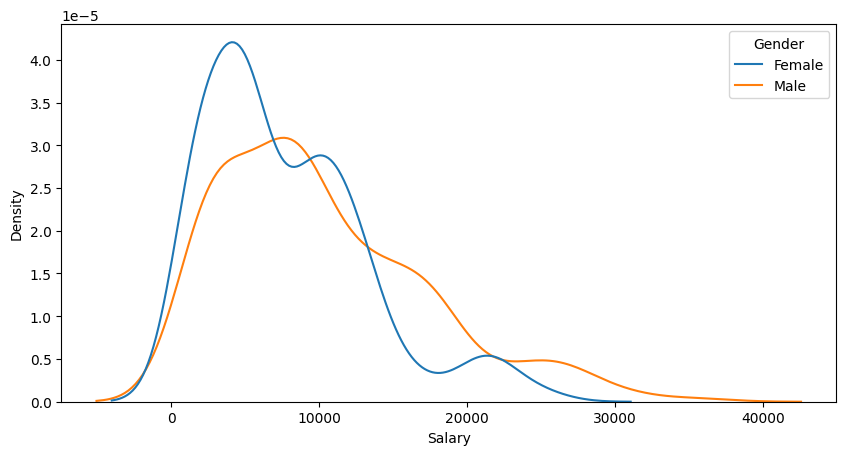

In [27]:
plt.figure(figsize=(10,5),dpi=100)

sns.kdeplot(data=df, x='Salary', hue= 'Gender',  color='red');

In [28]:
df.groupby('Nationality').mean('Salary')

,Salary
Nationality,
NonSaudi,6663.587302
Saudi,11236.476190


In [29]:
df.groupby('Gender').mean('Salary')

,Salary
Gender,
Female,7664.559524
Male,10235.503968


In [30]:
# convert to period
df['Date'] = pd.to_datetime([f'{x[:4]}{x[-2:]}'for x in df['Year Quarter']])


In [31]:
pd.to_datetime(df['Date'], format='%Y%m')

0     2017-01-01
1     2017-01-01
2     2017-01-01
3     2017-01-01
4     2017-04-01
         ...    
499   2021-01-01
500   2021-04-01
501   2021-04-01
502   2021-04-01
503   2021-04-01
Name: Date, Length: 504, dtype: datetime64[ns]

In [32]:
df

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency,Date
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR,2017-01-01
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR,2017-01-01
2,Primary,Saudi,Female,2017 Q1,4172,SAR,2017-01-01
3,Primary,Saudi,Male,2017 Q1,6172,SAR,2017-01-01
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR,2017-04-01
...,...,...,...,...,...,...,...
499,Doctorate,Saudi,Male,2021 Q1,35622,SAR,2021-01-01
500,Doctorate,NonSaudi,Female,2021 Q2,16727,SAR,2021-04-01
501,Doctorate,NonSaudi,Male,2021 Q2,23036,SAR,2021-04-01
502,Doctorate,Saudi,Female,2021 Q2,24632,SAR,2021-04-01


In [35]:
# mean salaries over time with gender color
plt.figure(figsize=(8,5),dpi=100)
gender_dff = df.groupby(['Date', 'Gender']).mean().reset_index()
fig = px.line(gender_dff, x="Date", y="Salary",color='Gender')
fig.show()

<Figure size 800x500 with 0 Axes>

In [36]:
# mean salaries over time with Nationality color
plt.figure(figsize=(8,5),dpi=100)
nationality_diff = df.groupby(['Date', 'Nationality']).mean().reset_index()
fig = px.line(nationality_diff, x="Date", y="Salary",color='Nationality')
fig.show()

<Figure size 800x500 with 0 Axes>

In [37]:
# salaries over time with Degree Level color
plt.figure(figsize=(8,5),dpi=100)
fig = px.box(df, x=df['Date'], y="Salary", color = 'Degree Level')
fig.show()

<Figure size 800x500 with 0 Axes>

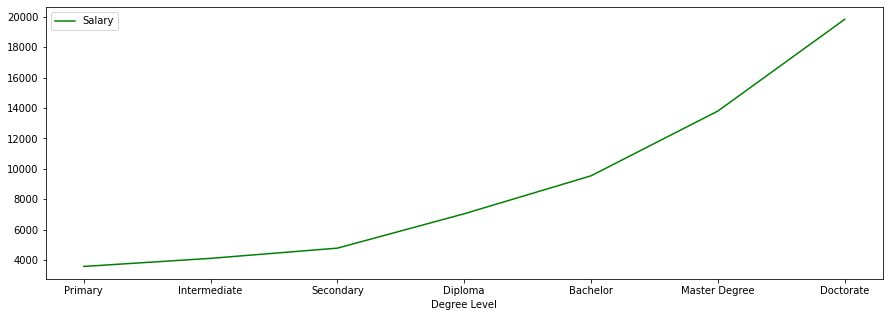

In [38]:
ax = df.groupby('Degree Level').mean('Salary').sort_values('Salary')
fig = ax.plot(figsize=(15, 5), color = 'Green')



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Degree Level  504 non-null    object        
 1   Nationality   504 non-null    object        
 2   Gender        504 non-null    object        
 3   Year Quarter  504 non-null    object        
 4   Salary        504 non-null    int64         
 5   Currency      504 non-null    object        
 6   Date          504 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 27.7+ KB


**In the next section I will use multiples machine learning algorithms to predict salaries based on the features given bold text**


since the dataset is small I will ues ba

algorithms:
*Linear Regression 
*Polynomal Regression
*SVM
*K-neabor
*decsion tree
*Random Forseet
*

In [40]:
#drop year quarter & currency 
df.drop(['Currency', 'Year Quarter', 'Date'], axis=1, inplace=True)

In [41]:
#get_dummies
df_d = pd.get_dummies(df, columns=['Nationality','Degree Level', 'Gender'])

In [42]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Salary                      504 non-null    int64
 1   Nationality_NonSaudi        504 non-null    uint8
 2   Nationality_Saudi           504 non-null    uint8
 3   Degree Level_Bachelor       504 non-null    uint8
 4   Degree Level_Diploma        504 non-null    uint8
 5   Degree Level_Doctorate      504 non-null    uint8
 6   Degree Level_Intermediate   504 non-null    uint8
 7   Degree Level_Master Degree  504 non-null    uint8
 8   Degree Level_Primary        504 non-null    uint8
 9   Degree Level_Secondary      504 non-null    uint8
 10  Gender_Female               504 non-null    uint8
 11  Gender_Male                 504 non-null    uint8
dtypes: int64(1), uint8(11)
memory usage: 9.5 KB


In [43]:
df_d.head()

,Salary,Nationality_NonSaudi,Nationality_Saudi,Degree Level_Bachelor,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Female,Gender_Male
0,1590,1,0,0,0,0,0,0,1,0,1,0
1,2173,1,0,0,0,0,0,0,1,0,0,1
2,4172,0,1,0,0,0,0,0,1,0,1,0
3,6172,0,1,0,0,0,0,0,1,0,0,1
4,1597,1,0,0,0,0,0,0,1,0,1,0


In [44]:
X = df_d.drop('Salary', axis=1)
y= df_d['Salary']

In [45]:
X

,Nationality_NonSaudi,Nationality_Saudi,Degree Level_Bachelor,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Female,Gender_Male
0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
499,0,1,0,0,1,0,0,0,0,0,1
500,1,0,0,0,1,0,0,0,0,1,0
501,1,0,0,0,1,0,0,0,0,0,1
502,0,1,0,0,1,0,0,0,0,1,0


In [46]:
y

0       1590
1       2173
2       4172
3       6172
4       1597
       ...  
499    35622
500    16727
501    23036
502    24632
503    28380
Name: Salary, Length: 504, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [49]:
X_train

,Nationality_NonSaudi,Nationality_Saudi,Degree Level_Bachelor,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Female,Gender_Male
130,0,1,0,0,0,0,0,0,1,1,0
427,0,1,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,1,0
372,1,0,0,0,0,0,1,0,0,1,0
443,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
63,0,1,0,0,0,0,0,1,0,0,1
326,0,1,1,0,0,0,0,0,0,1,0
337,1,0,1,0,0,0,0,0,0,0,1
11,0,1,0,0,0,0,0,1,0,0,1


In [50]:
y_train

130     5313
427    20431
2       4172
372     8779
443    23079
       ...  
63      6518
326    10467
337     8653
11      5958
351    13257
Name: Salary, Length: 453, dtype: int64

###**First algorithm will be Linear Regression**###


In [51]:
from sklearn.linear_model import LinearRegression 

In [52]:
model_Lr = LinearRegression()

In [53]:
model_Lr.fit(X_train, y_train)

LinearRegression()

In [54]:
X_train

,Nationality_NonSaudi,Nationality_Saudi,Degree Level_Bachelor,Degree Level_Diploma,Degree Level_Doctorate,Degree Level_Intermediate,Degree Level_Master Degree,Degree Level_Primary,Degree Level_Secondary,Gender_Female,Gender_Male
130,0,1,0,0,0,0,0,0,1,1,0
427,0,1,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,1,0
372,1,0,0,0,0,0,1,0,0,1,0
443,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
63,0,1,0,0,0,0,0,1,0,0,1
326,0,1,1,0,0,0,0,0,0,1,0
337,1,0,1,0,0,0,0,0,0,0,1
11,0,1,0,0,0,0,0,1,0,0,1


In [55]:
y_train

130     5313
427    20431
2       4172
372     8779
443    23079
       ...  
63      6518
326    10467
337     8653
11      5958
351    13257
Name: Salary, Length: 453, dtype: int64

In [56]:
#check overfitting vs underfitting on training data
trin_p = model_Lr.predict(X_train)

In [57]:
#evaluation 
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(y_train,trin_p))

1667.9215106122092

In [58]:
mean_absolute_error(y_train, trin_p)

1109.9889624724062

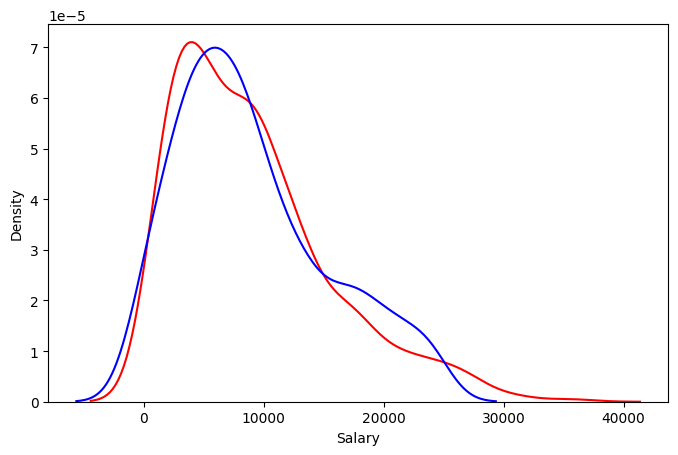

In [59]:
# plot Actual Value vs Fitted Values\
plt.figure(figsize=(8,5),dpi=100)
ax = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(trin_p, hist=False, color="b", label="Fitted Values" , ax=ax);

In [60]:
pred_Lr = model_Lr.predict(X_test)

In [61]:
pred_Lr

array([ 4544., 10528.,  1200.,   -48.,   496., 14800.,   -48.,  5936.,
        3760., 10672., 16640., 21232.,  8352., 10208.,  2512.,  7104.,
       16640.,  6080., 16640., 19200.,   -48.,   496., 10528.,  5936.,
        6080., 13088., 16640.,  8496.,   -48.,  5936.,  7104.,  6080.,
       13088.,  3056.,  7648., 17360.,  7104., 16640., 16640.,  3520.,
        8496., 10528., 12768.,  3760.,  5936.,  1200., 16640., 13088.,
        8496.,  3760.,  7648.])

In [62]:
y_test

18      4165
306    10035
104     2045
4       1597
156     1664
370    11836
32      1566
344     6790
81      3071
227    10081
492    14349
482    21528
95      8873
368    11022
65      1869
39      6632
432    12847
237     4455
452    13526
437    17074
12      1576
212     1433
290    10180
296     6988
269     4084
359    13373
460    12763
321     8378
64      1384
336     6470
19      5978
261     4822
315    13181
205     2300
179     7956
415    17276
31      6448
456    14305
444    11862
228     3960
333     8205
302     9993
405    15829
89      3019
312     7751
100     1980
496    10774
347    12475
289     7787
141     2753
215     7523
Name: Salary, dtype: int64

In [63]:
# dataframe of y_test vs y_preds
df_T=pd.DataFrame({'Actual':y_test, 'Predicted':pred_Lr})
df_T

,Actual,Predicted
18,4165,4544.0
306,10035,10528.0
104,2045,1200.0
4,1597,-48.0
156,1664,496.0
370,11836,14800.0
32,1566,-48.0
344,6790,5936.0
81,3071,3760.0
227,10081,10672.0


In [64]:
np.sqrt(mean_squared_error(y_test,pred_Lr))

1800.8882176717743

In [65]:
mean_absolute_error(y_test, pred_Lr)

1304.2549019607843

In [66]:
df['Salary'].mean()

8950.031746031746

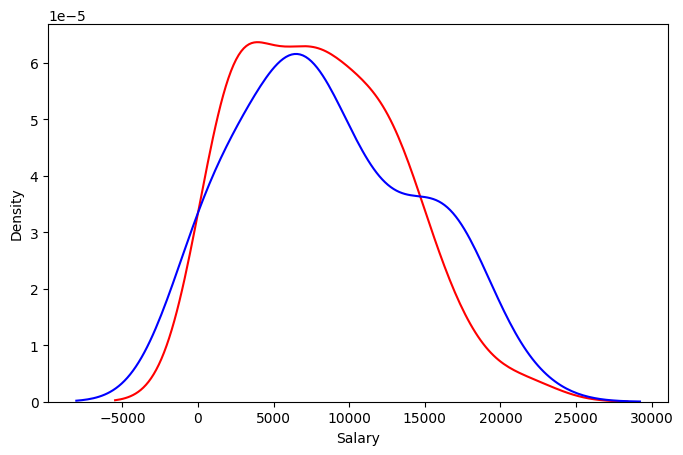

In [67]:
# Kde for y_test vs y_preds
plt.figure(figsize=(8,5), dpi=100)
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(pred_Lr, hist=False, color="b", label="Fitted Values" , ax=ax);

In [68]:
from sklearn.metrics import r2_score


In [69]:
r2_score(y_test, pred_Lr)

0.8688823252083054

In [70]:
# residuals
test_res = y_test - pred_Lr

In [71]:
test_res

18     -379.0
306    -493.0
104     845.0
4      1645.0
156    1168.0
370   -2964.0
32     1614.0
344     854.0
81     -689.0
227    -591.0
492   -2291.0
482     296.0
95      521.0
368     814.0
65     -643.0
39     -472.0
432   -3793.0
237   -1625.0
452   -3114.0
437   -2126.0
12     1624.0
212     937.0
290    -348.0
296    1052.0
269   -1996.0
359     285.0
460   -3877.0
321    -118.0
64     1432.0
336     534.0
19    -1126.0
261   -1258.0
315      93.0
205    -756.0
179     308.0
415     -84.0
31     -656.0
456   -2335.0
444   -4778.0
228     440.0
333    -291.0
302    -535.0
405    3061.0
89     -741.0
312    1815.0
100     780.0
496   -5866.0
347    -613.0
289    -709.0
141   -1007.0
215    -125.0
Name: Salary, dtype: float64

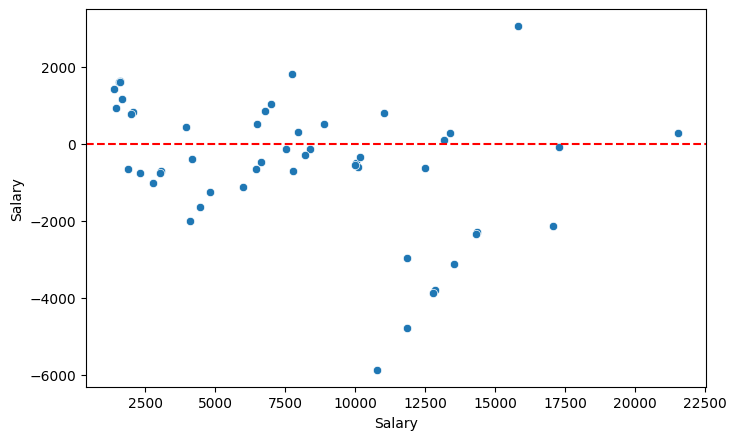

In [72]:
# plot residuls
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

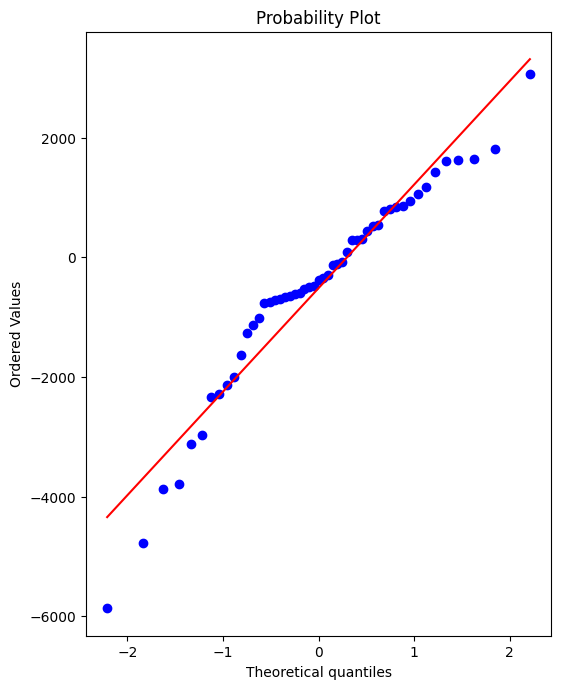

In [73]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

In [74]:
model_Lr.coef_

array([7.14359103e+16, 7.14359103e+16, 7.08948672e+15, 7.08948672e+15,
       7.08948672e+15, 7.08948672e+15, 7.08948672e+15, 7.08948672e+15,
       7.08948672e+15, 6.43370192e+15, 6.43370192e+15])

In [75]:
model_Lr.intercept_

-8.495909890571899e+16

In [76]:
model_Lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [77]:
# creating fuction to perform other algorithms
# I will use the base model since the data is small  

In [78]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    MAE = mean_absolute_error(y_test, preds)
    print(f'MAE : {MAE}')
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    
    plt.figure(figsize=(8,5), dpi=100)
    ax = sns.distplot(y_test, hist= False, color="r", label="Actual Value")
    sns.distplot(preds, hist=False, color="b", label="Predicted Values" , ax=ax);

MAE : 1304.2549019607843
RMSE : 1800.8882176717743


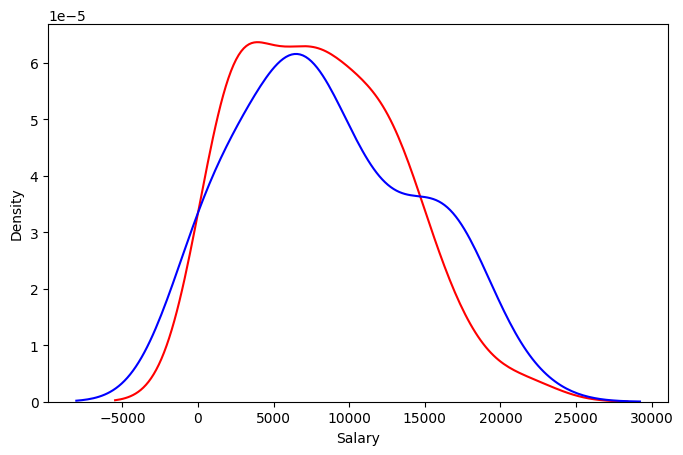

In [79]:
run_model(model_Lr,X_train,y_train,X_test,y_test)

##Poly_Regression

In [80]:
from sklearn.pipeline import make_pipeline

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
pipe = make_pipeline(PolynomialFeatures(6),LinearRegression())

MAE : 410.1372549019608
RMSE : 624.5587775915624


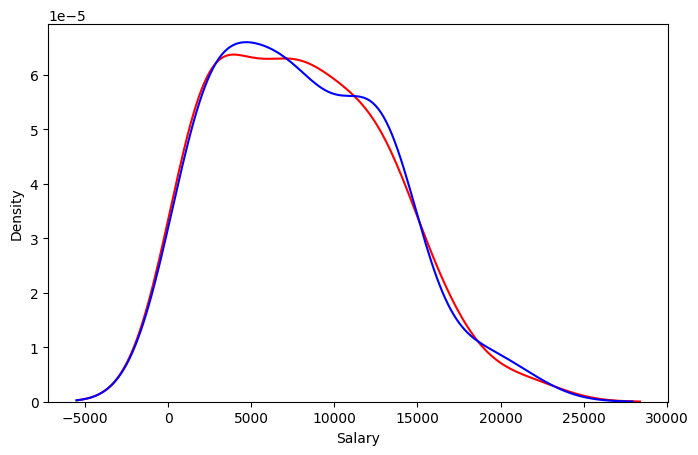

In [83]:
run_model(pipe,X_train,y_train,X_test,y_test)

###K_Neighbors Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 436.5019607843137
RMSE : 727.4550696994095


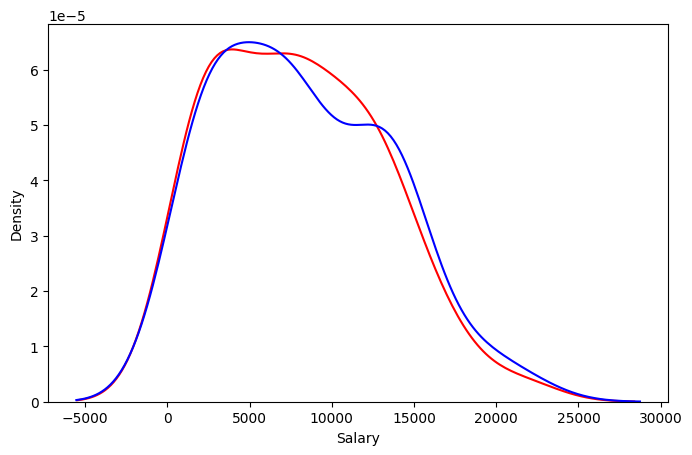

In [87]:
    
knr = KNeighborsRegressor()
run_model(knr,X_train,y_train,X_test,y_test)

##SVM Regression

In [88]:
from sklearn.svm import SVR

In [89]:
svr = SVR()

In [90]:
svr.fit(X_train, y_train)

SVR()

MAE : 4130.892122617115
RMSE : 4956.449051188314


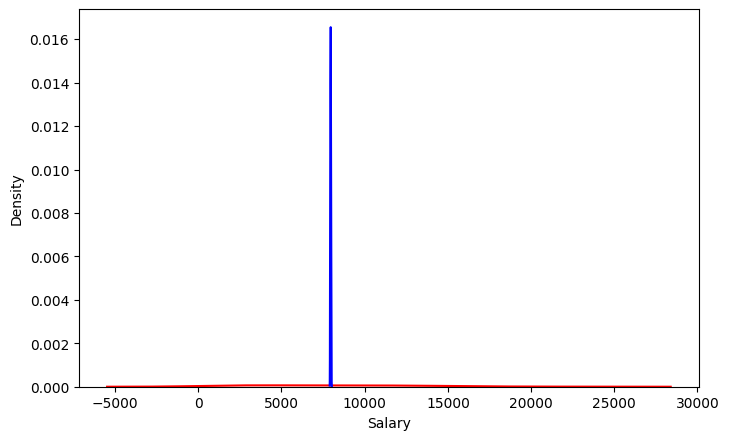

In [91]:
run_model(svr,X_train,y_train,X_test,y_test)

###Decision Tree Regression

In [93]:
from sklearn import tree

In [94]:
dtr = tree.DecisionTreeRegressor()

In [95]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

MAE : 385.2138045057595
RMSE : 627.3265883985509


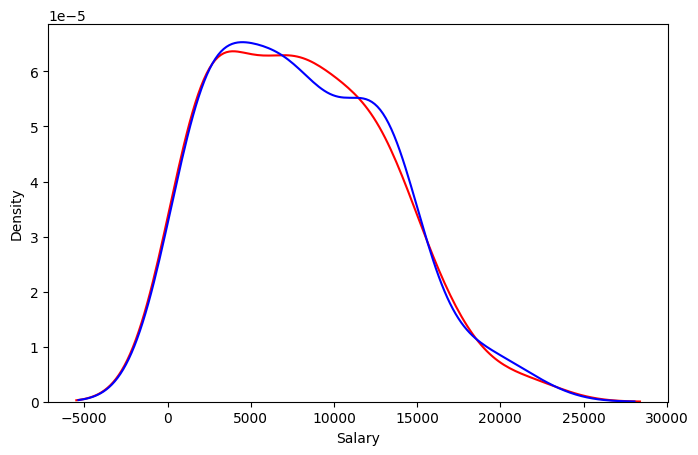

In [96]:
run_model(dtr,X_train,y_train,X_test,y_test)

In [97]:
dtr.feature_importances_

array([0.07774022, 0.05747013, 0.05665313, 0.02383341, 0.52868697,
       0.0005661 , 0.19367019, 0.00232895, 0.00078203, 0.03016021,
       0.02810866])

In [98]:
X_train.columns

Index(['Nationality_NonSaudi', 'Nationality_Saudi', 'Degree Level_Bachelor',
       'Degree Level_Diploma', 'Degree Level_Doctorate',
       'Degree Level_Intermediate', 'Degree Level_Master Degree',
       'Degree Level_Primary', 'Degree Level_Secondary', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [99]:
dtr.feature_importances_.argmax()

4

In [100]:
X.columns[4]

'Degree Level_Doctorate'

In [101]:
df_import = pd.DataFrame(index=X.columns,data=dtr.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

In [102]:
df_import

,Feature Importance
Degree Level_Doctorate,0.528687
Degree Level_Master Degree,0.193670
Nationality_NonSaudi,0.077740
Nationality_Saudi,0.057470
Degree Level_Bachelor,0.056653
Gender_Female,0.030160
Gender_Male,0.028109
Degree Level_Diploma,0.023833
Degree Level_Primary,0.002329
Degree Level_Secondary,0.000782


##Random Forest Regression

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rfr = RandomForestRegressor()

MAE : 385.52504894504835
RMSE : 623.5860930059577


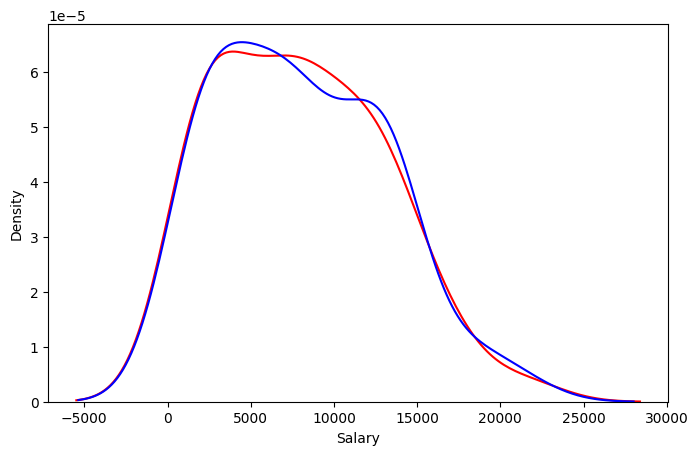

In [105]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [106]:
import_rfr = pd.DataFrame(index=X.columns,data=rfr.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

In [107]:
import_rfr

,Feature Importance
Degree Level_Doctorate,0.522254
Degree Level_Master Degree,0.198346
Nationality_NonSaudi,0.068966
Nationality_Saudi,0.065701
Degree Level_Bachelor,0.057925
Gender_Female,0.032005
Gender_Male,0.027066
Degree Level_Diploma,0.024016
Degree Level_Primary,0.002445
Degree Level_Secondary,0.000988


##AdaBoost Regression

In [108]:
from sklearn.ensemble import AdaBoostRegressor

In [109]:
AdB = AdaBoostRegressor()

In [110]:
AdB.fit(X_train, y_train)

AdaBoostRegressor()

MAE : 1811.2751426397915
RMSE : 2195.3665557521444


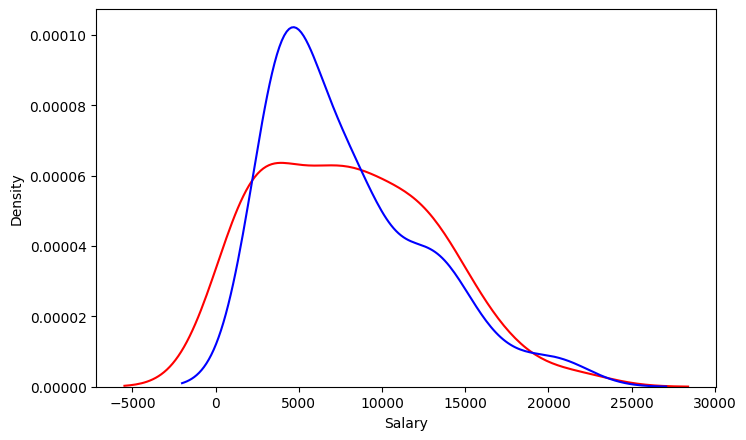

In [111]:
run_model(AdB,X_train,y_train,X_test,y_test)

In [112]:
import_AdB = pd.DataFrame(index=X.columns,data=AdB.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

In [113]:
import_AdB

,Feature Importance
Degree Level_Doctorate,0.670070
Degree Level_Master Degree,0.146888
Nationality_NonSaudi,0.057546
Nationality_Saudi,0.050011
Degree Level_Bachelor,0.026525
Gender_Female,0.026267
Gender_Male,0.022692
Degree Level_Diploma,0.000000
Degree Level_Intermediate,0.000000
Degree Level_Primary,0.000000


##Gradient Boosting Regression

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
gbr = GradientBoostingRegressor()

In [116]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

MAE : 382.3856603941374
RMSE : 619.0976042361268


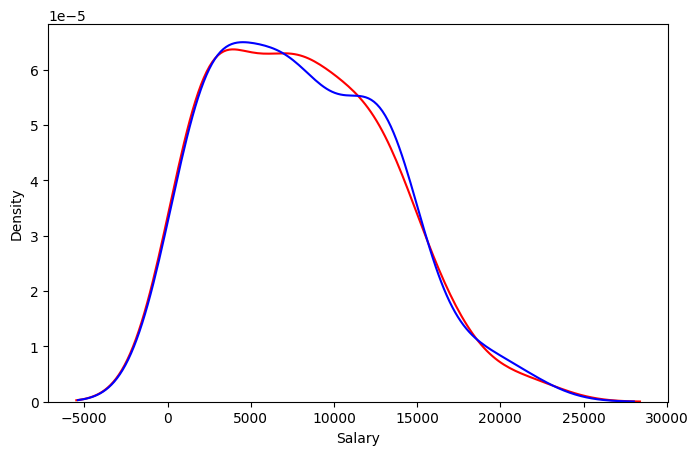

In [117]:
run_model(gbr,X_train,y_train,X_test,y_test)

In [118]:
import_gbr = pd.DataFrame(index=X.columns,data=gbr.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

In [119]:
import_gbr

,Feature Importance
Degree Level_Doctorate,0.521292
Degree Level_Master Degree,0.183323
Nationality_NonSaudi,0.077820
Nationality_Saudi,0.054977
Degree Level_Bachelor,0.041847
Gender_Female,0.031554
Gender_Male,0.026925
Degree Level_Primary,0.023414
Degree Level_Intermediate,0.020856
Degree Level_Secondary,0.016057
